# Метод Монте-Карло в физике

Методом Монте-Карло называют целую множество различных метоедов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
(10% от общей оценки)

Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)} R^d
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    G = sp.gamma(1+D/2)
    V = np.pi**(D/2)*(R**D)/G
    return V


1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

$$
2D:\;\;\pi R^2 = \pi
$$

$$
3D:\;\;\frac{4}{3} \pi R^3 = \frac{4}{3} \pi
$$

In [3]:
print(getSphereVolumeExact(2)-np.pi)
print(getSphereVolumeExact(3)-4/3*np.pi)

0.0
8.881784197001252e-16


<IPython.core.display.Javascript object>


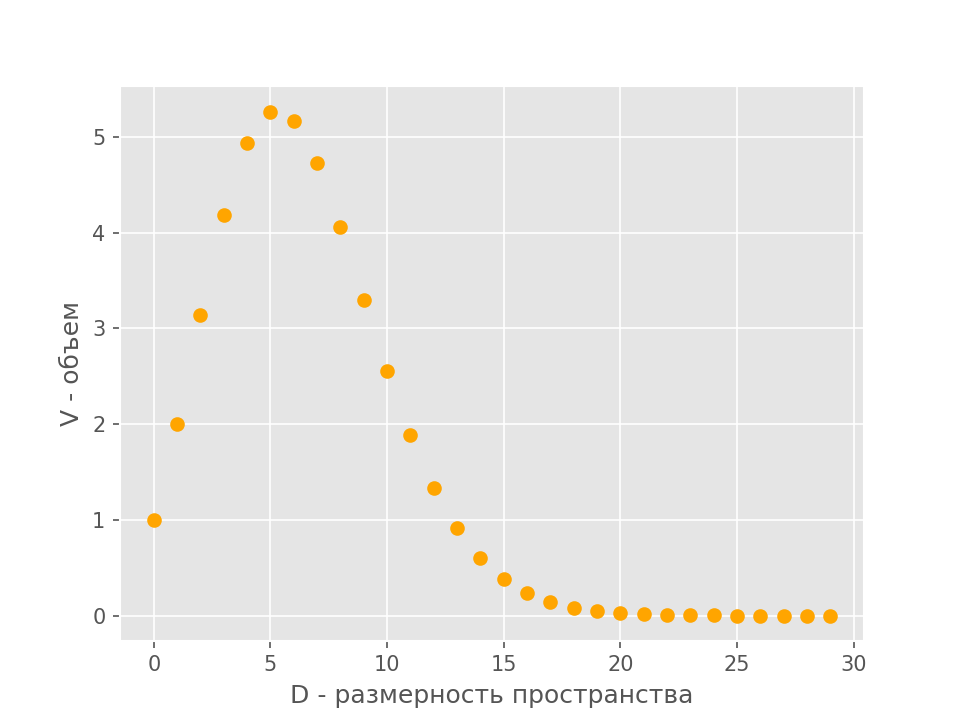

Text(0, 0.5, 'V - объем')

In [5]:
for i in range(30):
    plt.plot(i, getSphereVolumeExact(i), 'o', color="orange") 
plt.xlabel("D - размерность пространства")
plt.ylabel("V - объем")

### Задание 1.2
(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [6]:
rndm = np.random.RandomState(500)
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    points = rndm.uniform(-1, 1, size=(D, N))
    norm = np.linalg.norm(points, axis=0)
    inside = norm <= 1.
    perc = np.count_nonzero(inside)
    V = (2*R)**D*perc/N
    return V

In [7]:
import time

start_time = time.time()
getSphereVolumePseudorandom(10**8, 2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.548215389251709 seconds ---


Постройте график зависимости числа узлов $N$ при котором достигается относительная точность порядка $10^{-8}$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$. Для нахождения соответствующего $N$ используйте алгоритм удвоения $N$, который вы использовали для оценки точности интегралов в 6-ой домашней работе.

In [8]:
def epsilon(a, b):
    return abs(a-b)/a

D = 1 eps = 0.0 N = 10


<IPython.core.display.Javascript object>


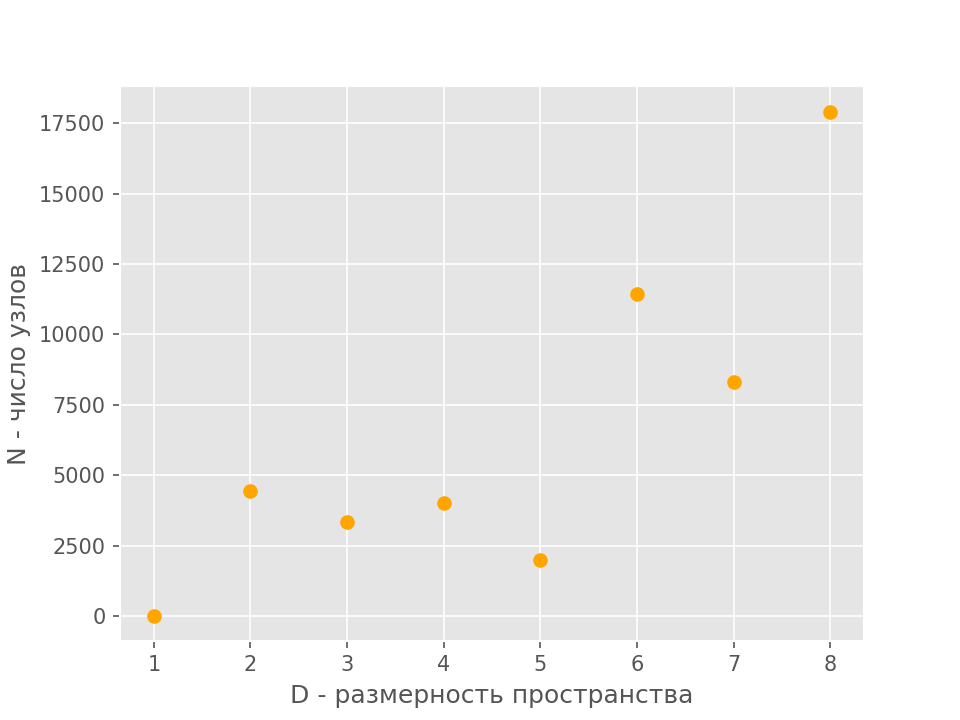

D = 2 eps = 8.833363812671133e-06 N = 4422
D = 3 eps = 4.9632971596031314e-06 N = 3348
D = 4 eps = 7.273264525361466e-06 N = 4001
D = 5 eps = 4.4838576109136503e-07 N = 1994
D = 6 eps = 2.112481168508679e-06 N = 11431
D = 7 eps = 3.09001244254395e-06 N = 8317
D = 8 eps = 3.984383949091127e-06 N = 17913


In [9]:
for D in range(1, 9):
    V_exact = getSphereVolumeExact(D)
    for N in range(10, 10**5):
        V_random = getSphereVolumePseudorandom(N, D)
        if epsilon(V_exact, V_random) < 1e-5:
            break
    print("D =",D,"eps =", epsilon(V_exact, V_random),"N =", N)
    plt.plot(D, N, 'o', color="orange")
plt.xlabel("D - размерность пространства")
plt.ylabel("N - число узлов")
plt.show()

График N(D) мы конечно построили, но толку от него мало. Так как чиселки мы кидаем случайно, то от самого N ничего не зависит, лишь то, как быстро мы попадем в минимум нужной точности.

Построим зависимость ошибки от N

<IPython.core.display.Javascript object>


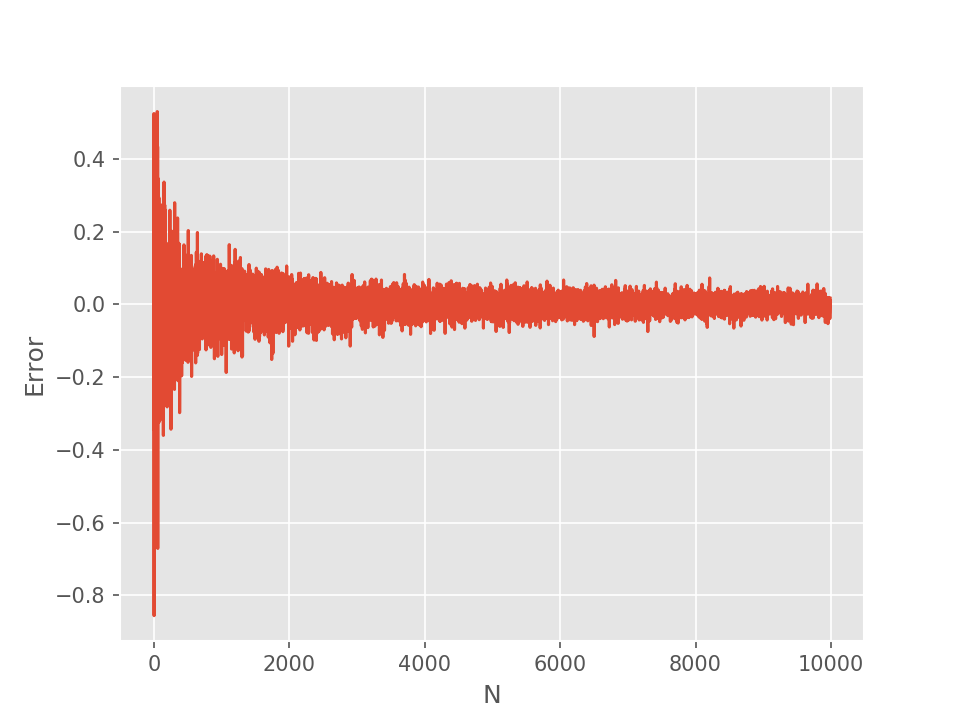

Text(0, 0.5, 'Error')

In [10]:
err=[]
for i in range(10, 10**4):
    a = getSphereVolumePseudorandom(i, 2)
    err.append(a-np.pi)
#     print("err =", abs(a-np.pi), "N =", i)
plt.plot(err)
plt.xlabel("N")
plt.ylabel("Error")

Посмотрим поближе

<IPython.core.display.Javascript object>


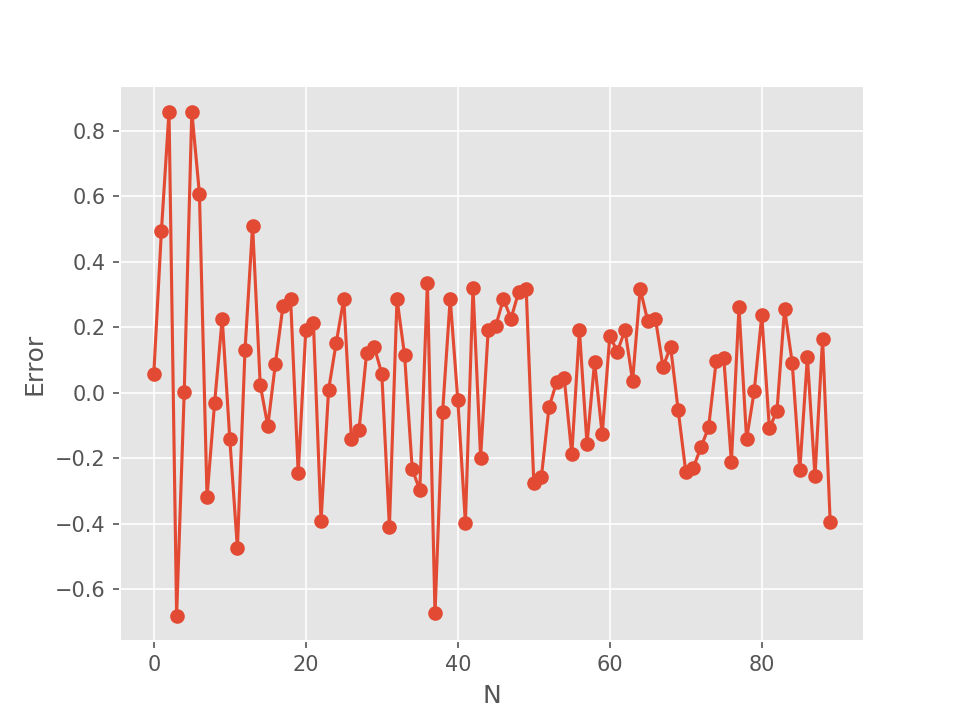

Text(0, 0.5, 'Error')

In [20]:
err=[]
for i in range(10, 10**2):
    a = getSphereVolumePseudorandom(i, 2)
    err.append(a-np.pi)
plt.plot(err, 'o-')
plt.xlabel("N")
plt.ylabel("Error")

Отчетливо видно, как мы частенько прыгаем около 0.
А еще можно проверить это шагая большими N:

D = 1 eps = 0.0 N = 10


<IPython.core.display.Javascript object>


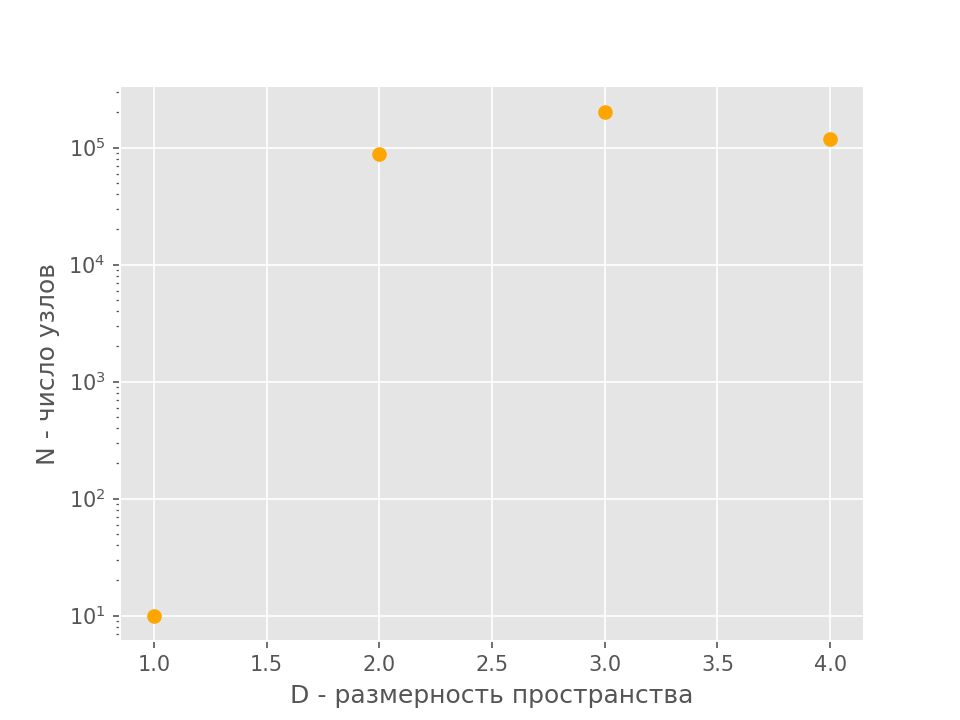

D = 2 eps = 1.5572176872117815e-06 N = 88010
D = 3 eps = 7.407953124769295e-06 N = 203010
D = 4 eps = 6.8818492891966636e-06 N = 118010


In [38]:
for D in range(1, 5):
    V_exact = getSphereVolumeExact(D)
#     V_random = getSphereVolumePseudorandom(10, D)
    for N in range(10, 10**7, 1000):
        V_random = getSphereVolumePseudorandom(N, D)
        if epsilon(V_exact, V_random) < 1e-5:
            break
    print("D =",D,"eps =", epsilon(V_exact, V_random),"N =", N)
    plt.plot(D, N, 'o', color="orange")
plt.ylabel("N - число узлов")
plt.xlabel("D - размерность пространства")
plt.yscale("log")
plt.show()

Ч. т. д.

### Задание 1.3

(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq` выполните команду 
`pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [14]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [8]:
sobol_seq.i4_sobol_generate?

In [15]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    points = sobol_seq.i4_sobol_generate(D, N)
    norm = np.linalg.norm(points, axis=1)
    inside = norm <= 1.
    perc = np.count_nonzero(inside)
    V = (2*R)**D*perc/N
    return V

In [16]:
start_time = time.time()
getSphereVolumeQuasirandom(10**6, 2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 13.918839454650879 seconds ---


Странно, те же действия через Собольский генератор делаются в сотни раз дольше

Сравните точность вчисления объема для квазислучайной погрешности, построив такой же график $N(D)$ при которых достигается точность $10^{-8}$, как для псевдослучайных чисел.

D = 1 eps = 0.0 N = 10


<IPython.core.display.Javascript object>


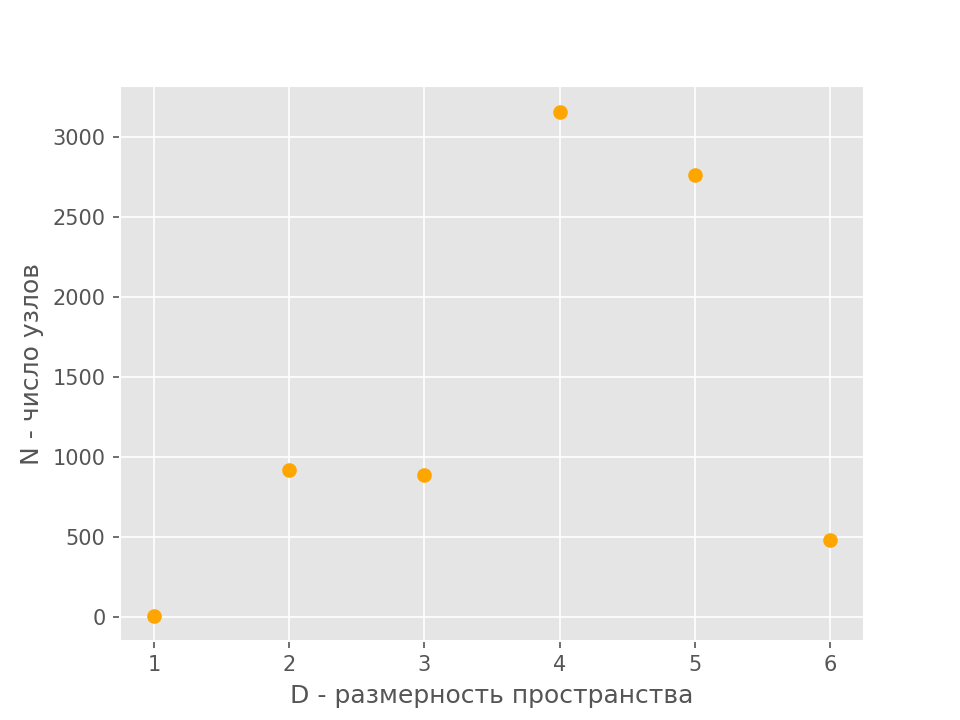

D = 2 eps = 6.221954305307189e-06 N = 918
D = 3 eps = 6.245202383582878e-06 N = 890
D = 4 eps = 6.760049276877537e-06 N = 3158
D = 5 eps = 3.9701386662029285e-06 N = 2760
D = 6 eps = 2.112481168508679e-06 N = 483


In [39]:
for D in range(1, 7):
    V_exact = getSphereVolumeExact(D)
    for N in range(10, 10**5):
        V_random = getSphereVolumeQuasirandom(N, D)
        if epsilon(V_exact, V_random) < 1e-5:
            break
    print("D =",D,"eps =", epsilon(V_exact, V_random),"N =", N)
    plt.plot(D, N, 'o', color="orange")
plt.xlabel("D - размерность пространства")
plt.ylabel("N - число узлов")
plt.show()

Сделайте выводы об эффективности квазислучайных последовательностей. 

Точек нужно, конечно, поменьше, но считается все гораздо дольше, до 7D ждать не стал. 

<IPython.core.display.Javascript object>


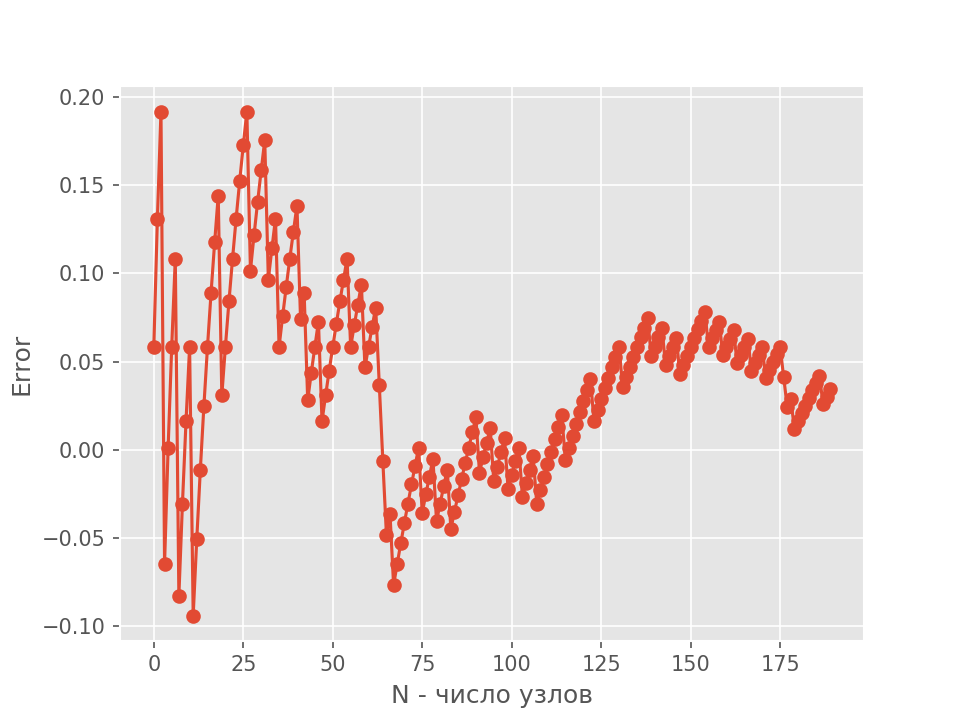

Text(0, 0.5, 'Error')

In [36]:
err=[]
for i in range(10, 200):
    a = getSphereVolumeQuasirandom(i, 2)
    err.append(a-np.pi)
plt.plot(err, 'o-')
plt.xlabel("N - число узлов")
plt.ylabel("Error")

Смахивает на систематизацию рандома :D

В целом алгоритм все - таки действеннее.

## Задание 2

(50% от общей оценки)

Рассмотрим решетку $n\times n$ в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние когда все спины одинаково ориентированы. Однако при ненлевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблемотичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [23]:
#Генетический алгоритм на феромагнетиках?
#Будем строить спиновую эволюцию (потирает ладошки) :D
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = 2*rndm.randint(0, 2, size=(N,N))-1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [24]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = len(state)
    state1 = np.hstack((state[:, N-1].reshape(N, -1), state, state[:, 0].reshape(N, -1)))
    state2 = np.vstack((state1[N-1, :], state1, state1[0, :]))
    i+=1
    j+=1
    E = -state2[i,j]*np.sum(state2[i+1,j]+state2[i-1,j]+state2[i,j+1]+state2[i,j-1])
    dE = -2*E
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. Можете использовать как псевдослучайную, так и квазислучайную последовательность, на ваш выбор. 

Обратите внимание, что если вам нужно сгенерировать большое количество случайных чисел и далее использовать их в цикле, то быстрее будет за один раз сгенерировать нужное количество случайных чисел и потом использовать их, чем генерировать их по одному в цикле. 

In [25]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = len(state)
    dE = np.zeros(N**2)
    state1 = np.copy(state)
    i, j = rndm.randint(0, N-1, size=(2, N**2))
    for k in range(N**2):
        dE[k] = getDeltaE(i[k], j[k], state1)
        if dE[k] <= 0:
            state[i[k], j[k]] = -state[i[k], j[k]]
        else:  
            if (rndm.random() < np.exp(-dE[k]/T)):
                state[i[k], j[k]] = -state[i[k], j[k]]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [26]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E=0
    N = len(state) 
    state1 = np.hstack((state[:, N-1].reshape(N, -1), state, state[:, 0].reshape(N, -1)))
    state2 = np.vstack((state1[N-1, :], state1, state1[0, :]))
    for i in range(1, N):
        for j in range(1, N):
            E += -state2[i,j]*np.sum(state2[i+1,j]+state2[i-1,j]+state2[i,j+1]+state2[i,j-1])
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [27]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

Далее задаются начальные параметры: 
**Nt** - количество точек по температуре, 
**N** - линейный размер решетки, 
**eqStep** - количество попыток переворота спина в течение которых система приводится к равновесному сосотоянию, обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,
**steps** - количество попыток переворота спина в течение на которых рассчитывается значения энергии и намагниченности, нужно для усреднения случайных значений

Подберите наибольшие значения этих параметров таким образом, что бы ваша программа выполнялась выполнялась за разумно короткое время 

In [34]:
N       = 10         # размер решетки NxN
Nt      = 100        # количество точек температуры
eqSteps = 300       # количество раз выполнения makeFlip для установления равновесия
steps   = 100         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

Далее представлен основной блок программы, соединяющий всё написанное выше в одно целое. Здесь, в цикле по точкам температуры, задается случайное начальное состояние, приводится к равновесному, и далее вычисляется средние значения энергии и намагниченности, и строится их график.

100%|████████████████████████████████████████| 100/100 [02:09<00:00,  1.29s/it]


<IPython.core.display.Javascript object>


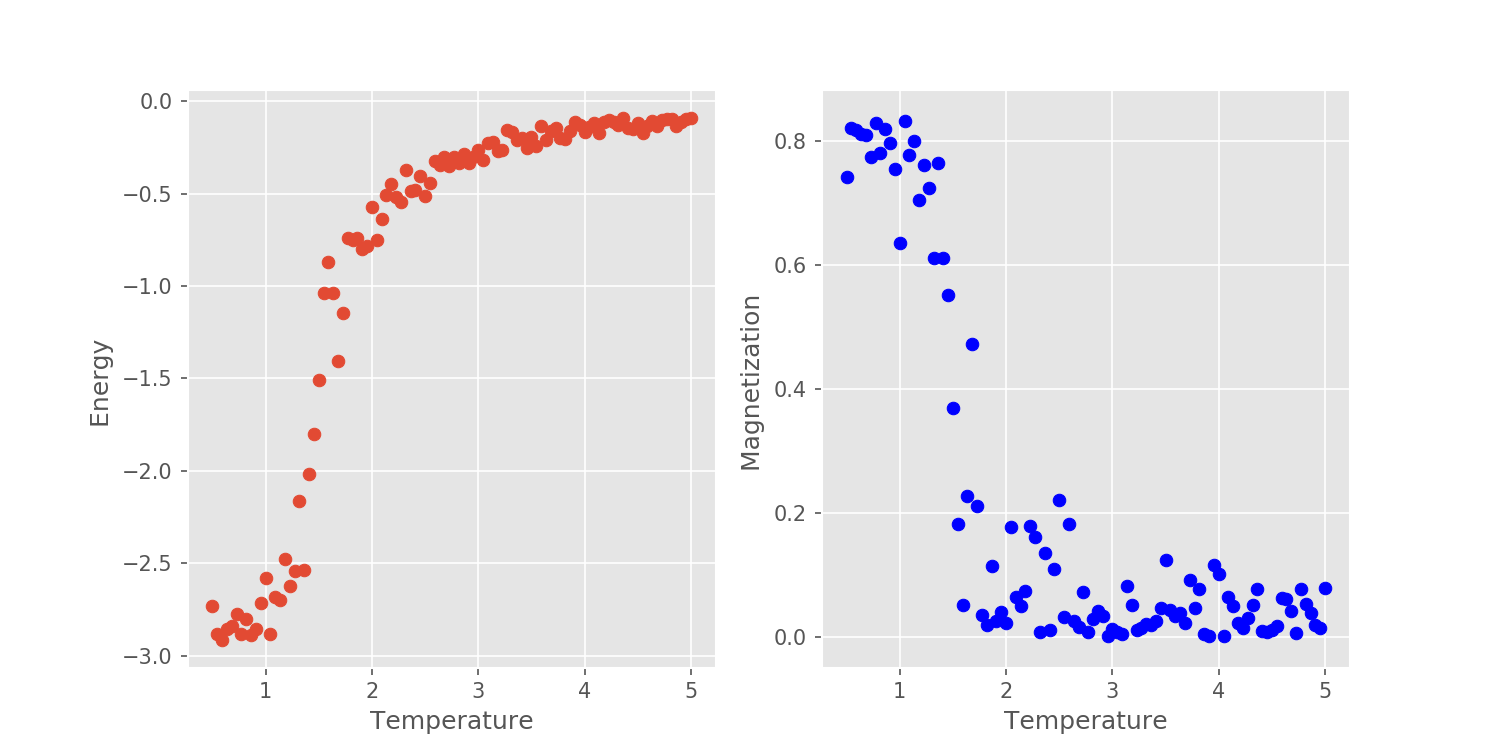

In [35]:
for t in tqdm(list(np.arange(Nt))):
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for _ in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for _ in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)
    

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описыввают ли они поведение феромагнетиков и фазовые переходы?

Графики имеют неплохие очертания реальных зависимостей

In [27]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


Дополнительно. Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое. 

<IPython.core.display.Javascript object>


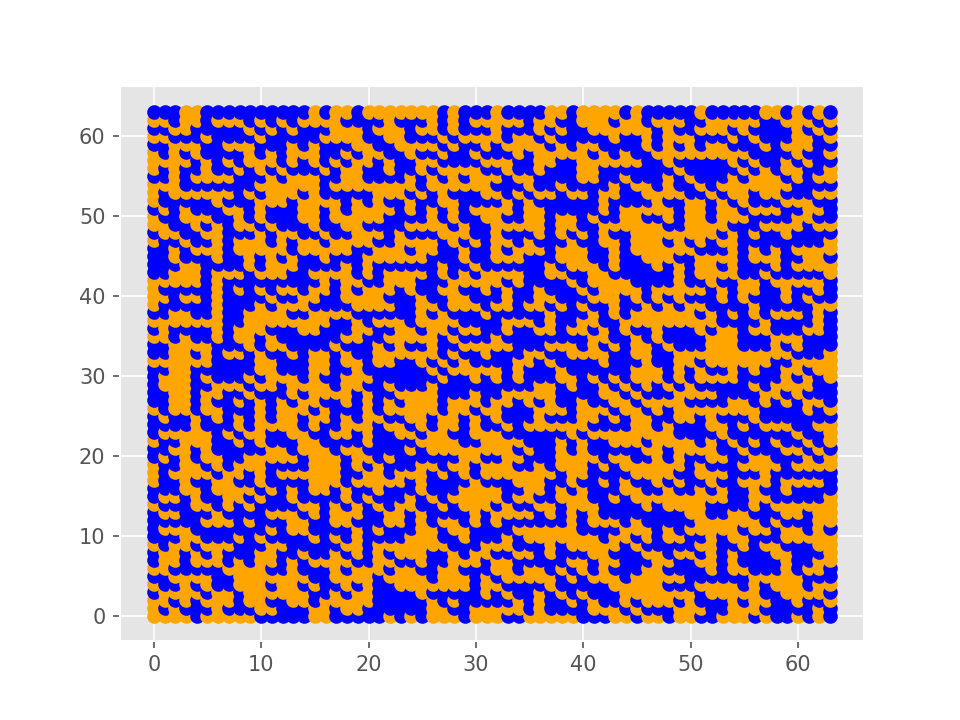

100%|████████████████████████████████████████| 200/200 [00:29<00:00,  6.73it/s]


<IPython.core.display.Javascript object>


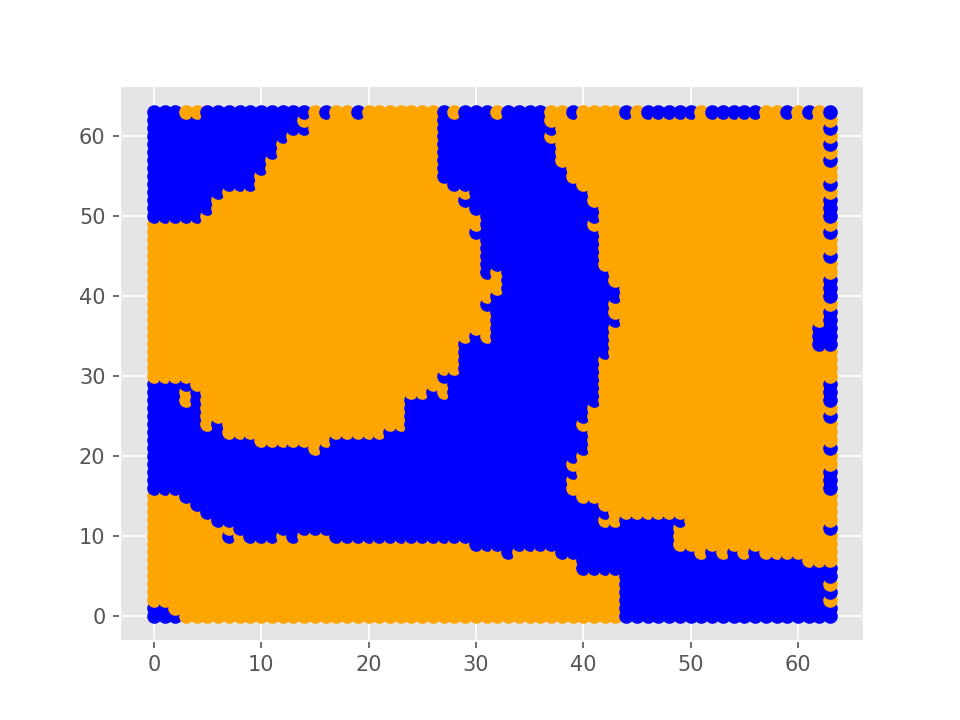

100%|████████████████████████████████████████| 400/400 [00:59<00:00,  6.68it/s]


<IPython.core.display.Javascript object>


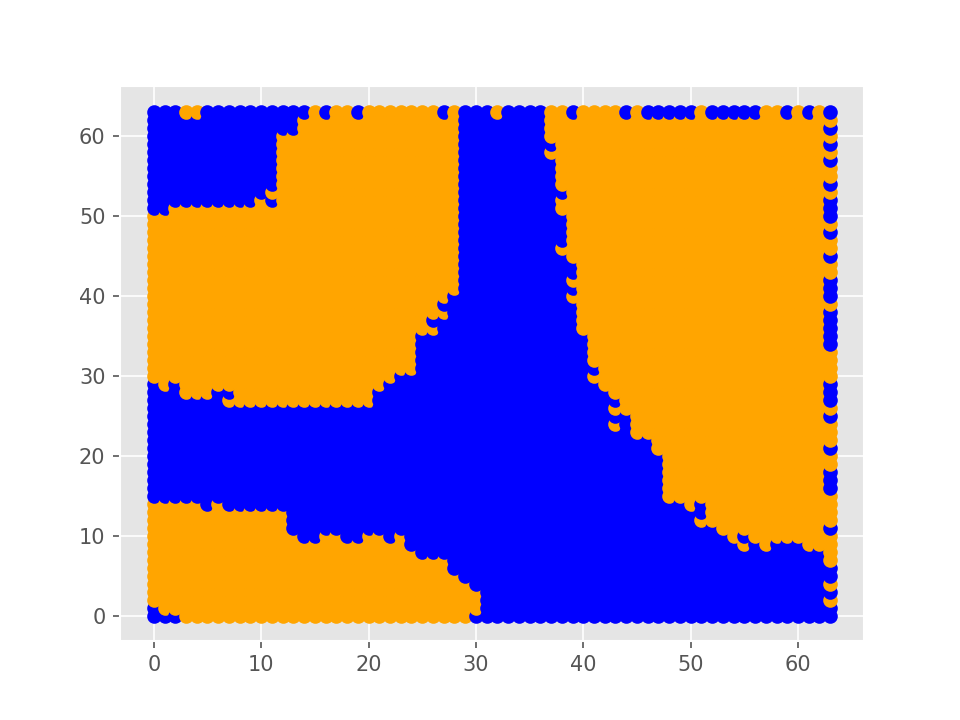

100%|██████████████████████████████████████████| 64/64 [00:13<00:00,  4.91it/s]


In [30]:
from tqdm import tqdm    
N = 64
state = getInitialState(N)
T = 0.1

for n in range(3):
    if n != 0:
        for _ in tqdm(list(np.arange(200*n))):
            makeFlip(T, state);
    plt.figure()
    for i in tqdm(list(np.arange(N))):
        for j in range(N):
            if state[i, j]<0:
                plt.plot(i, j, 'o', color="b")
            else:
                plt.plot(i, j, 'o', color="orange")

Какая популяция победит? Делаем ставки, господа... 

Правильный ответ можно будет получить после выставления автоматов 😊

<IPython.core.display.Javascript object>


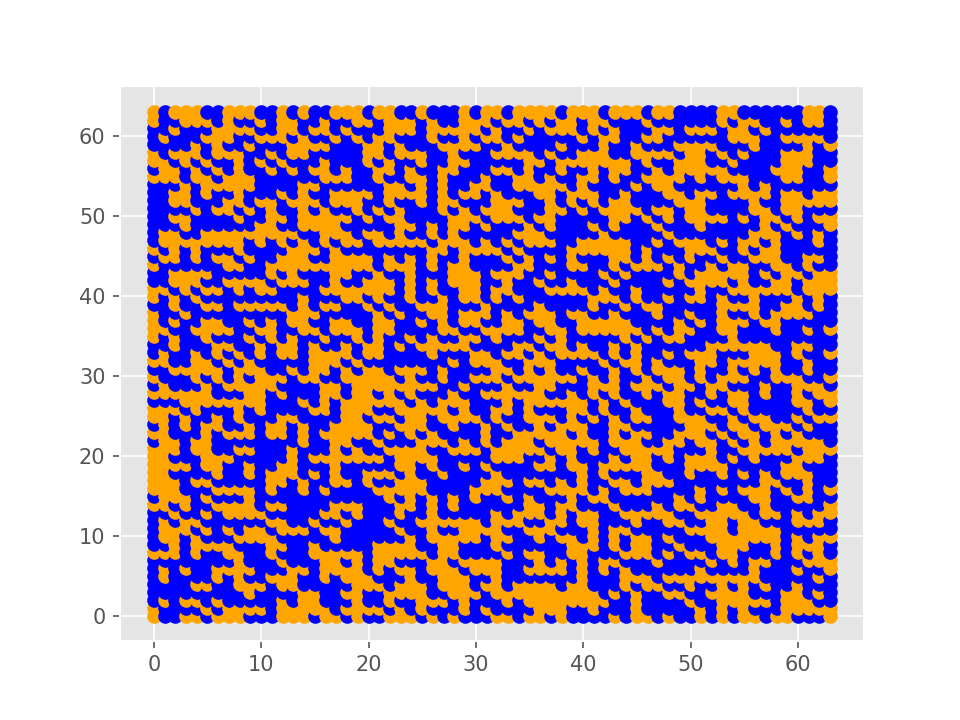

100%|████████████████████████████████████████| 200/200 [00:28<00:00,  7.10it/s]


<IPython.core.display.Javascript object>


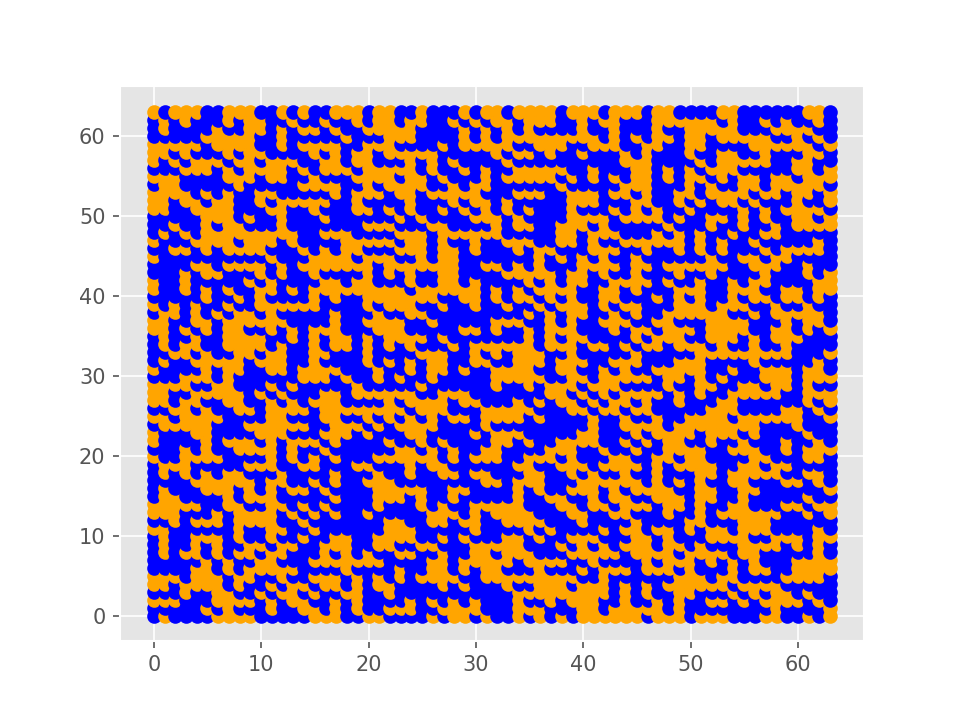

100%|████████████████████████████████████████| 400/400 [00:56<00:00,  7.11it/s]


<IPython.core.display.Javascript object>


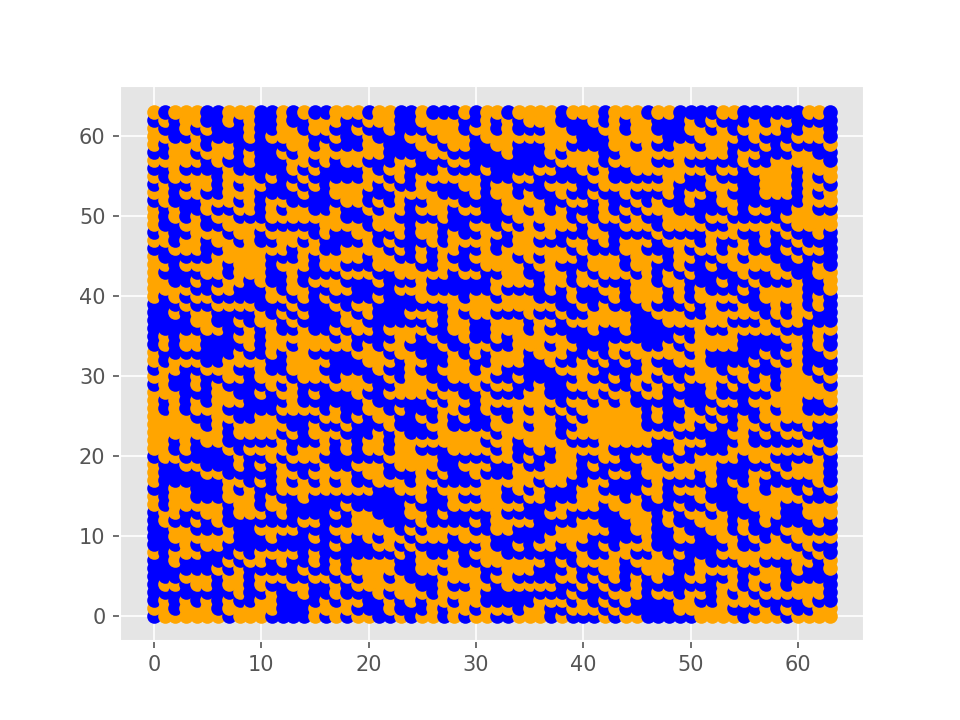

100%|██████████████████████████████████████████| 64/64 [00:12<00:00,  4.93it/s]


In [31]:
N = 64
state = getInitialState(N)
T = 10

for n in range(3):
    if n != 0:
        for _ in tqdm(list(np.arange(200*n))):
            makeFlip(T, state);
    plt.figure()
    for i in tqdm(list(np.arange(N))):
        for j in range(N):
            if state[i, j]<0:
                plt.plot(i, j, 'o', color="b")
            else:
                plt.plot(i, j, 'o', color="orange")

Видно, что при низкой температуре энергия спокойно минимизируются, в то время как спины постепенно выкручиваются в одну сторону. 

При высоких же Т, почти ничего не меняется. Спины с большой вероятностью увеличивают энергию, вместо ее минимизации.